In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [44]:
def plot_run_time(filename):
    
    df = pd.read_csv(filename, index_col=0,sep=' ')
    
    fig = plt.figure()
    ax = plt.gca()
    
    P = df['n_threads'].to_numpy().astype(np.int)
    
    time = df['t_total'].to_numpy().astype(np.float32)
    label = 'Processors'
    ax.loglog(P, time, label=label)
    
    plt.legend()
    plt.title("run-time for" + " " + filename)
    plt.xlabel("P")
    plt.ylabel("Avg. Run Time (s)")
    
    return fig

def plot_speedup(filename):
    df = pd.read_csv(filename, index_col=0,sep=' ')
    
    fig = plt.figure()
    ax = plt.gca()
    
    strong = "strong" in filename
    exp_type = "strong" if strong else "weak"
    
    P = df['n_threads'].to_numpy().astype(np.int)
    plt.loglog(P, P, label="ideal speedup", color="black",linestyle="--")
    
    time = df['t_total'].to_numpy().astype(np.float32)
    T_s = np.float32(df['t_total'].iloc[1])
    
    if strong:
        T_1 = T_s
    else:
        T_1 = np.sqrt(P) * T_s
    S_P = T_1 / P
    
    label = 'Processors'
    
    ax.loglog(P, S_P, label=label)
    
    plt.legend()
    plt.title("speedup for" + " " + filename)
    plt.xlabel("P")
    plt.ylabel("S")
    
    return fig

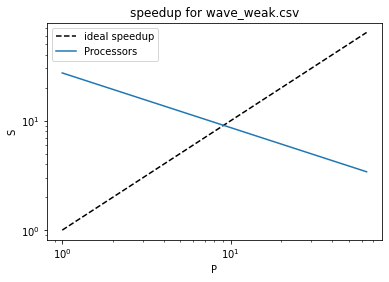

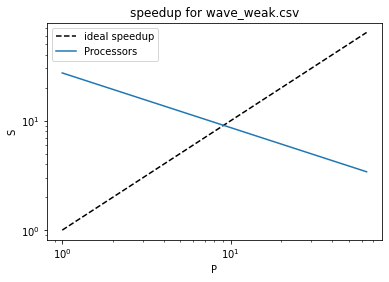

In [46]:
plot_speedup("wave_weak.csv")